# Questão 1

Letra (A): Sigma_8 tem o valor de 0.696


/tmp/ipykernel_1105773/450441839.py:19: RuntimeWarning: invalid value encountered in scalar divide
  return num/den
/tmp/ipykernel_1105773/450441839.py:23: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  variancia=quad(integrando, 0, np.inf, args=r, limit=1000, epsabs=1e-8, epsrel=1e-6)[0]


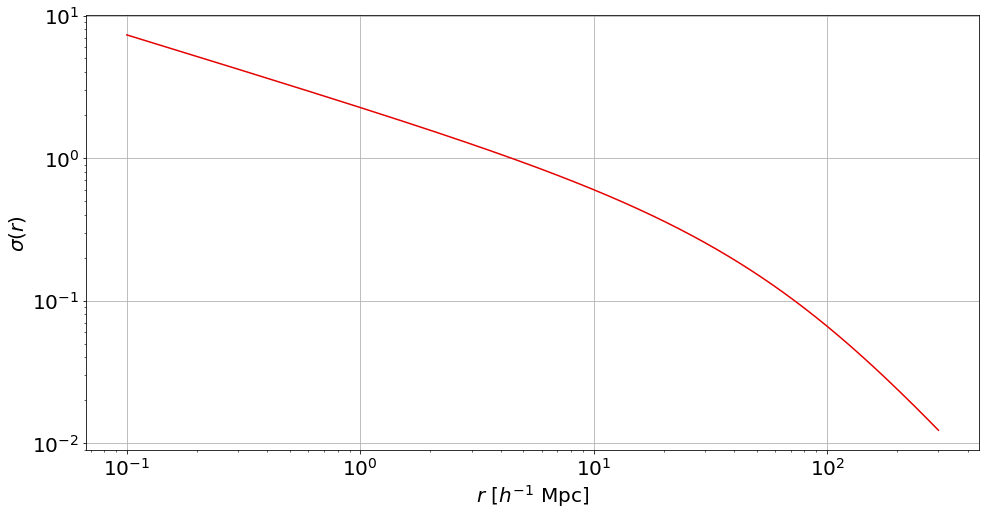

In [67]:
from scipy.integrate import quad
import scipy.constants as sc
import numpy as np
import matplotlib.pyplot as plt

# Letra (A)

a=3.4e6
km=0.0255

def potencia (k): 
    elevado_na_menos_dois=(1+(k/km)**(1.5))
    return a*k*elevado_na_menos_dois**(-2)

def janela(k,r): 
    x = k*r
    den=x**3
    num=3*(np.sin(x) -x*np.cos(x))
    return num/den

def calcula_variancia(r):
    def integrando(k,r): return potencia(k)*(janela(k,r)**2)*(k**2)
    variancia=quad(integrando, 0, np.inf, args=r, limit=1000, epsabs=1e-8, epsrel=1e-6)[0]
    variancia=(1/(2*np.pi**2))*variancia
    return np.sqrt(variancia)

print(f"Letra (A): Sigma_8 tem o valor de {calcula_variancia(8):.3f}")

rs=np.arange(0,300,0.1)
variancias=[]
for r in rs: variancias.append(calcula_variancia(r))

fig=plt.figure(figsize=[16,8])
plt.plot(rs,variancias, color='xkcd:red')
plt.xticks(size=20)
plt.yticks(size=20)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$r$ [$h^{-1}$ Mpc]', size=20)
plt.ylabel(r'$\sigma(r)$', size=20)
plt.grid()
plt.savefig('varianciaXraio.png', dpi=300, facecolor='w', edgecolor='w', bbox_inches='tight')

In [ ]:
# Letra (B)
rho_crit=2.77e11
omega_m=0.3
rho_bar=omega_m*rho_crit

delta_c=1.686

def massa_para_raio(m): return (np.array(m)/((4/3)*np.pi*rho_bar))**(1/3)

def dist(m):
    constantes=np.sqrt(2/np.pi)*rho_bar*delta_c/m
    raio_correspondente=massa_para_raio(m)
    variancia=calcula_variancia(raio_correspondente)
    primeiro_termo=constantes/variancia
    segundo_termo=np.exp((-1*delta_c**2)/(2*variancia**2))
    m_low, m_high=m*0.99, m*1.01
    r_low, r_high=massa_para_raio(m_low), massa_para_raio(m_high)
    lnsigma_low, lnsigma_high= np.log(calcula_variancia(r_low)), np.log(calcula_variancia(r_high))
    dlnsigma_dm= (lnsigma_high-lnsigma_low)/(m_high-m_low)
    return primeiro_termo*segundo_termo*np.abs(dlnsigma_dm)


limite=[1e13, 1e14, 1e15, 1e16]
numeros=[]
for lim in limite: numeros.append(quad(dist, lim,1e18, limit=1000, epsabs=1e-8, epsrel=1e-6)[0])

print(f"Letra (B): N(M) para log(M)=13,14,15,16 é, respectivamente, {numeros[0]:.3e}, {numeros[1]:.3e}, {numeros[2]:.3e}, {numeros[3]:.3e}")



Letra (B): N(M) para log(M)=13,14,15,16 é, respectivamente, 5.320e-04, 1.526e-05, 4.303e-09, 1.053e-16
